**Bushra Hoteit**

**1. Data Collection**

***Register and download the datasets ‘historical_stocks.csv’ and ‘historical_stock_prices.csv’ from the download at the bottom of this page.***

***Load the dataset into a Pandas DataFrame. Ensure you understand the format and types of each column in each dataset.***

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
try:
  if not os.path.exists("historical_stocks.csv") or not os.path.exists("historical_stock_prices.csv"):
    raise FileNotFoundError("CSV files not found. Please ensure it is in your working directory.")
  else:
    stocks=pd.read_csv("historical_stocks.csv", encoding='utf-8')
    stock_prices=pd.read_csv("historical_stock_prices.csv", encoding='utf-8')
  if stocks.empty or stock_prices.empty:
    raise ValueError("One or both of the files loaded are empty. Please check the data.")
  print("Successfully loaded both datasets!")

except Exception as e:
  print(f"Error loading data: {str(e)}")
  raise


Successfully loaded both datasets!


In [3]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
stock_prices.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


**2. Data Cleaning**

***Identify and handle missing values in the datasets. Choose a strategy to deal with them (e.g., filling with the mean or median, interpolation, or removal).***

In [5]:
# Missing values in 'stocks' file

print("Missing values in 'stocks' file:\n", stocks.isnull().sum())

Missing values in 'stocks' file:
 ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64


In [6]:
# Drop the rows with missing values

stocks = stocks.dropna()

In [7]:
print("Missing values in 'stocks' file after cleaning:\n", stocks.isnull().sum())

Missing values in 'stocks' file after cleaning:
 ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64


In [8]:
# Missing values in 'stocks_prices' file

print("Missing values in 'stock_prices' file:\n", stock_prices.isnull().sum())

Missing values in 'stock_prices' file:
 ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64


In [9]:
# Handle missing values in stock prices using forward fill

price_columns = ['open', 'close', 'low', 'high', 'volume']

stock_prices[price_columns] = stock_prices[price_columns].ffill()

In [10]:
print("Missing values in 'stock_prices' file after cleaning:\n", stock_prices.isnull().sum())

Missing values in 'stock_prices' file after cleaning:
 ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64


***Check for duplicate entries and remove them if any.***

In [14]:
print(f"Stocks duplicates: {stocks.duplicated().sum()}")
print(f"Stock Prices duplicates: {stock_prices.duplicated().sum()}")

Stocks duplicates: 0
Stock Prices duplicates: 0


***Convert the ’Date’ column to a datetime format if not already and set it as the index of your DataFrame.***

In [16]:
stock_prices['date'] = pd.to_datetime(stock_prices['date'], errors='coerce')
stock_prices = stock_prices.sort_values(by=['date'])
stock_prices.set_index('date', inplace=True)

**3. Data Segmentation by Decade**

***Create a new column in the DataFrame for prices to represent the decade.***

In [24]:
stock_prices['decade'] = stock_prices.index.year // 10 * 10

# List of decades
decades = sorted(stock_prices['decade'].dropna().unique().astype(int).tolist())
decades

[1970, 1980, 1990, 2000, 2010]

***Segment the data into separate DataFrames for each decade for easier comparative analysis.***

In [26]:
# Dictionary to store decade dataframe
decade_dfs = {}

# Create a DataFrame for each decade
for decade in decades:
    decade_dfs[decade] = stock_prices[stock_prices['decade'] == decade]

In [27]:
# Access 1990 decade

df_1990 = decade_dfs[1990]
df_1990.head()

,ticker,open,close,adj_close,low,high,volume,decade
date,,,,,,,,
1990-01-02,TNC,8.750000,8.812500,2.299473,8.750000,9.062500,14400,1990.0
1990-01-02,OMI,2.543210,2.567901,1.186639,2.518518,2.592592,64000,1990.0
1990-01-02,FLOW,3.625000,3.625000,3.625000,3.500000,3.625000,14700,1990.0
1990-01-02,MXIM,0.515625,0.523438,0.331317,0.515625,0.531250,68800,1990.0
1990-01-02,SYNL,4.500000,4.555555,2.422966,4.500000,4.555555,6700,1990.0


**4. Exploratory Data Analysis by Decade**

***Merge the stock_prices dataset with the stock dataset using the appropriate key to include sector information with the stock prices.***

In [28]:
merged_data = pd.merge(stock_prices, stocks, on='ticker', how ='left')

merged_data.head()

,ticker,open,close,adj_close,low,high,volume,decade,exchange,name,sector,industry
0,MRK,1.565972,1.545139,0.268152,1.541667,1.565972,475200,1970.0,NYSE,"MERCK & COMPANY, INC.",HEALTH CARE,MAJOR PHARMACEUTICALS
1,MRO,5.633611,5.757882,0.203525,5.633611,5.757882,105900,1970.0,NYSE,MARATHON OIL CORPORATION,ENERGY,OIL & GAS PRODUCTION
2,XOM,1.929688,1.937500,0.025623,1.925781,1.937500,1174400,1970.0,NYSE,EXXON MOBIL CORPORATION,ENERGY,INTEGRATED OIL COMPANIES
3,JNJ,1.250000,1.218750,0.000004,1.218750,1.253472,1195200,1970.0,NYSE,JOHNSON & JOHNSON,HEALTH CARE,MAJOR PHARMACEUTICALS
4,CNP,11.099500,11.169750,0.107916,10.994125,11.204875,24400,1970.0,NYSE,"CENTERPOINT ENERGY, INC.",PUBLIC UTILITIES,ELECTRIC UTILITIES: CENTRAL


***For each decade DataFrame, calculate summary statistics (mean, median, standard deviation) for the Open, High, Low, Close, and Volume columns.***

In [29]:
def calculate_decade_stats(decade_df, decade):
    print(f"\nSummary Statistics for {decade}s:")

    stats = decade_df[price_columns].describe().transpose()
    stats['median'] = decade_df[price_columns].median()
    stats['IQR'] = decade_df[price_columns].quantile(0.75) - decade_df[price_columns].quantile(0.25)
    print(stats[['mean', 'median', 'std', 'IQR', 'min', 'max']].round(2))
    return stats

# Calculate summary statistics for each decade
decade_stats = {}
for decade in decades:
    decade_stats[decade] = calculate_decade_stats(decade_dfs[decade], decade)


Summary Statistics for 1970s:
             mean     median         std        IQR     min          max
open         5.56       3.55        5.78       5.08    0.13        32.67
close        5.56       3.54        5.78       5.08    0.13        32.67
low          5.51       3.50        5.72       5.02    0.12        32.42
high         5.63       3.62        5.83       5.14    0.14        33.08
volume  610599.84  157018.00  1040450.37  772400.00  100.00  24148800.00

Summary Statistics for 1980s:
             mean    median         std        IQR     min          max
open        22.41      5.13     1035.54       8.38    0.03     301875.0
close       22.45      5.14     1039.16       8.38    0.03     303750.0
low         22.00      5.09     1015.99       8.26    0.03     301875.0
high        22.84      5.22     1053.20       8.44    0.03     304687.5
volume  729492.19  47700.00  4278726.24  268759.50  100.00  708086400.0

Summary Statistics for 1990s:
             mean    median         s

***Create visualizations for each decade:***

***Time series plots for average monthly Close prices.***

/tmp/ipython-input-30-3692048215.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['close'].resample('M').mean()


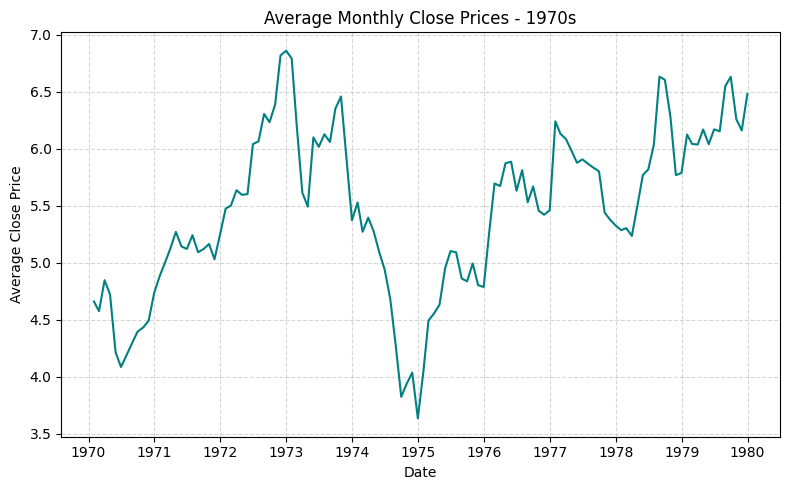

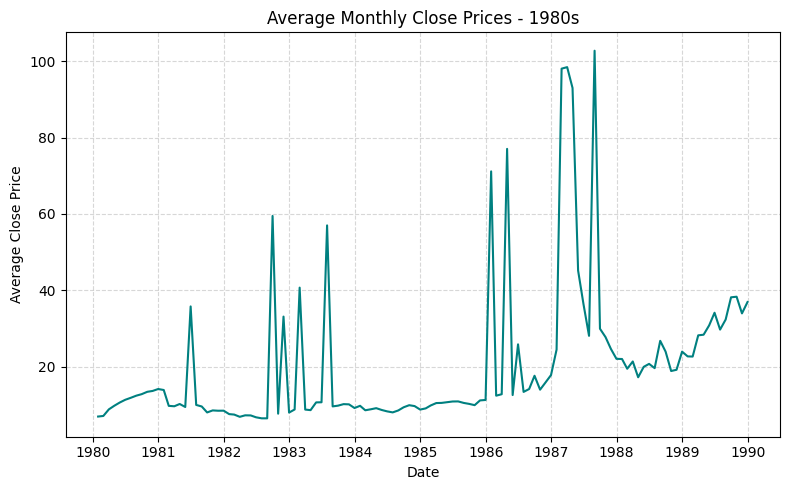

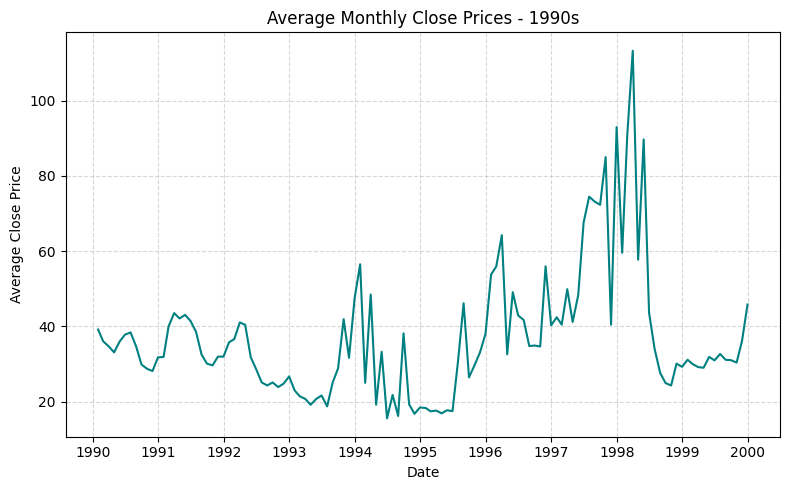

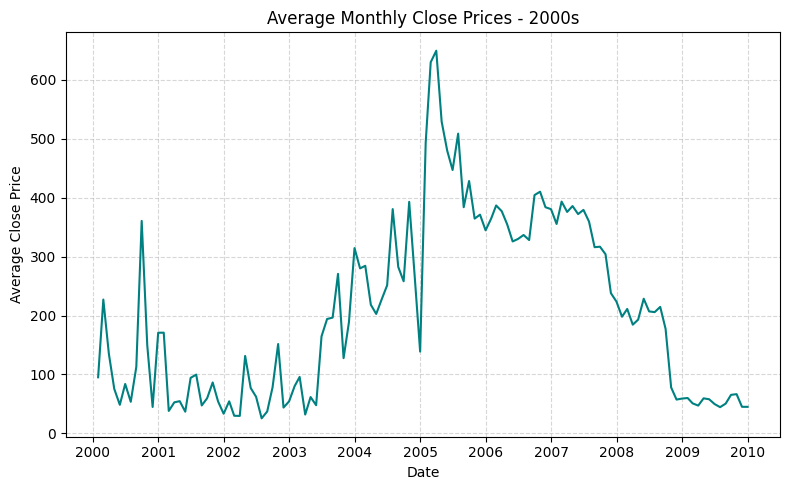

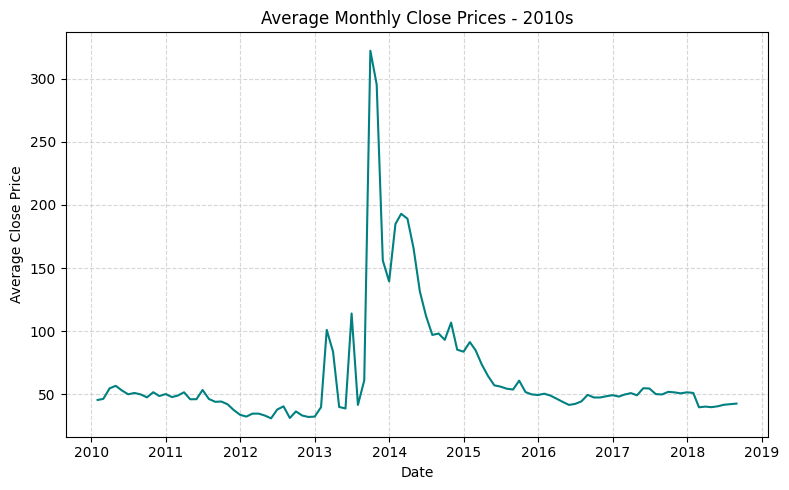

In [30]:
for dec, df in decade_dfs.items():
    # Resample to monthly average close prices
    monthly_close = df['close'].resample('M').mean()

    plt.figure(figsize=(8, 5))
    plt.plot(monthly_close.index, monthly_close.values, label=f'{dec}s', color='teal')
    plt.title(f'Average Monthly Close Prices - {dec}s')
    plt.xlabel('Date')
    plt.ylabel('Average Close Price')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


***Histograms for Volume to analyze the distribution and any shifts over the decades.***

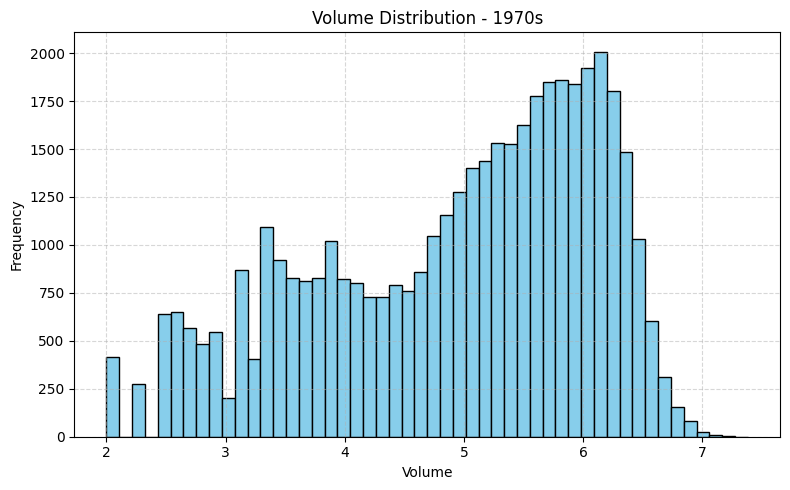

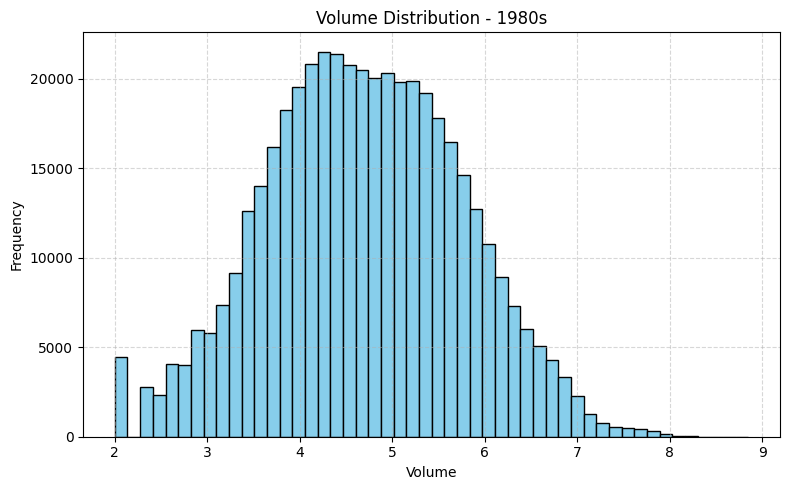

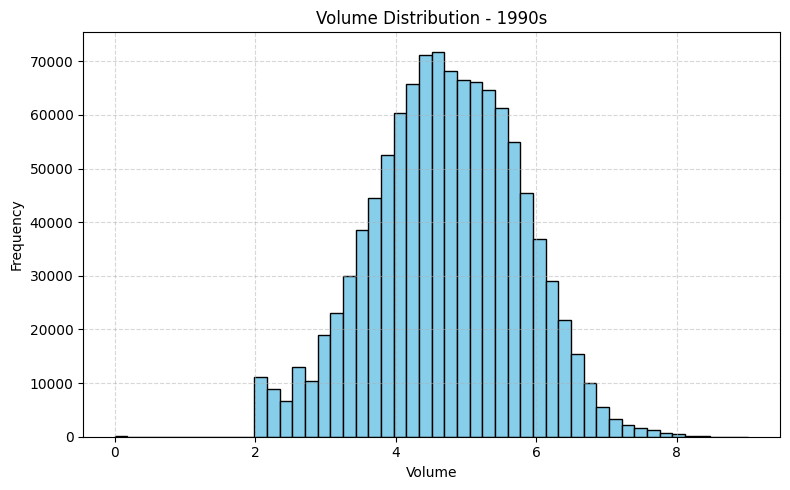

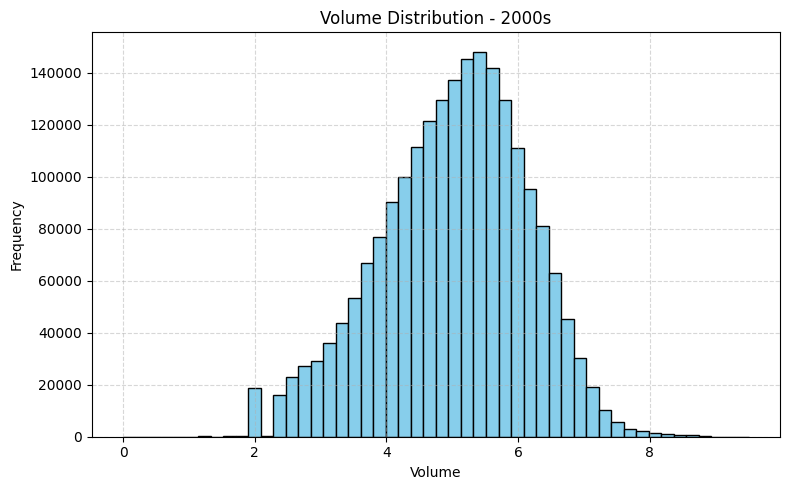

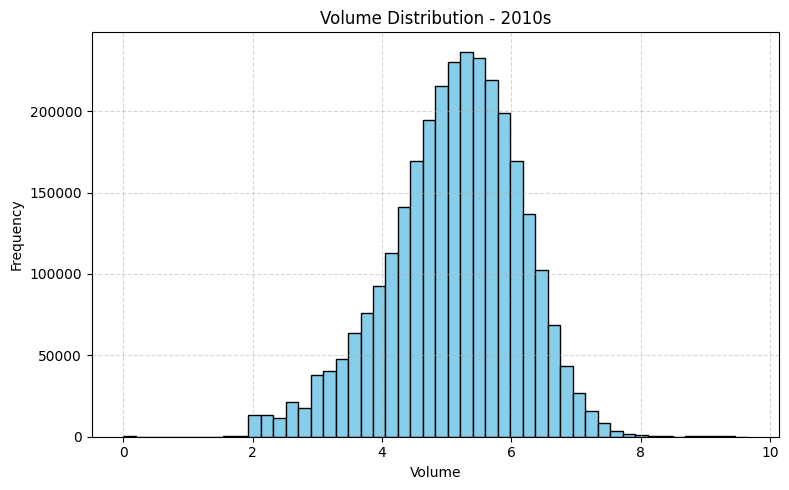

In [31]:
for dec, df in decade_dfs.items():
    plt.figure(figsize=(8, 5))
    plt.hist(np.log10(df['volume']), bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Volume Distribution - {dec}s')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


***Box plots for the High and Low prices to examine the range and presence of outliers.***

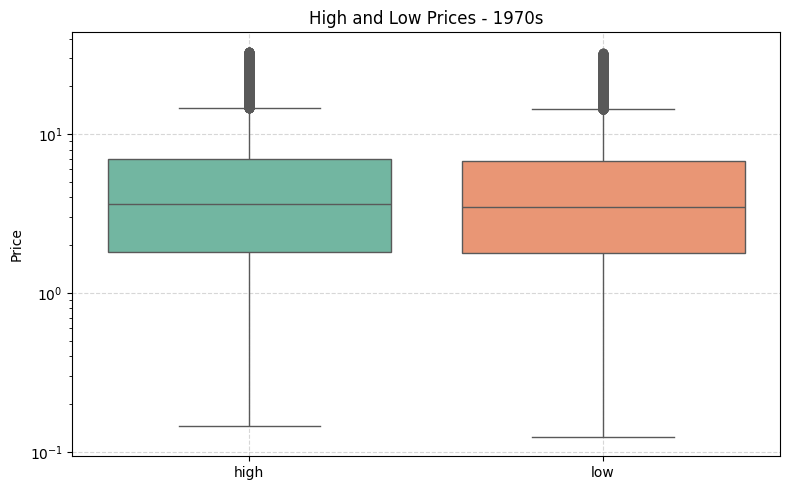

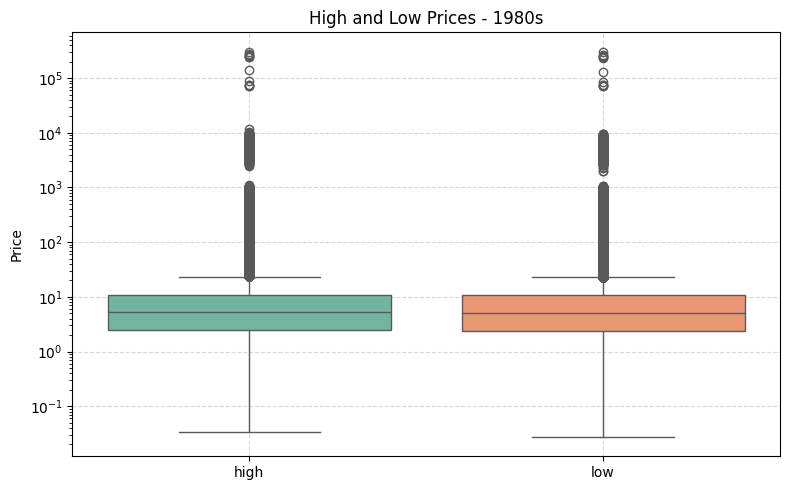

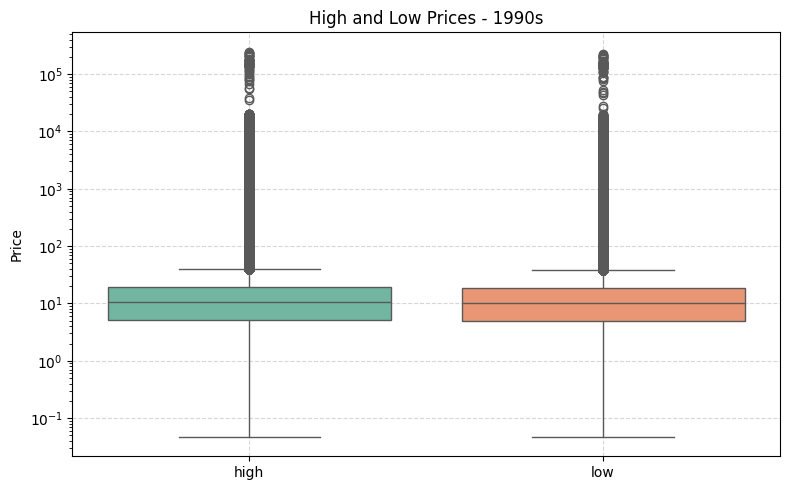

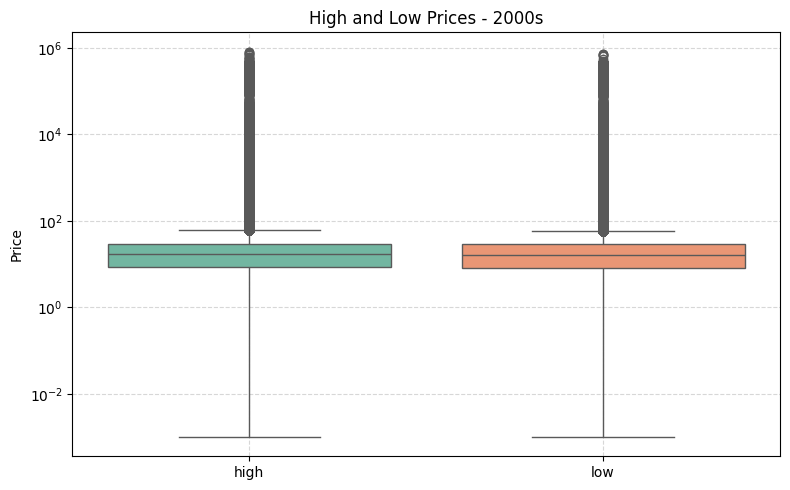

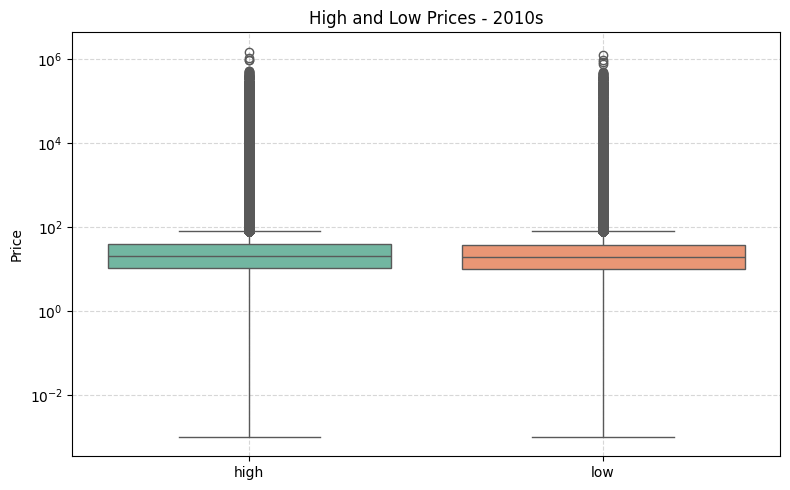

In [32]:
for dec, df in decade_dfs.items():
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[['high', 'low']], palette='Set2')
    plt.title(f'High and Low Prices - {dec}s')
    plt.ylabel('Price')
    plt.yscale('log')  # Using log scale for better visualization
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


**5. Comparative Analysis**

***Compare the summary statistics across decades and document any notable trends or changes in stock price behaviors and trading volumes.***

**Median Prices:**

We saw an upward trend in median stock prices for every decade which shows market growth & economic expansion. Prices rose from 3.54 in the 1970's to 20.4 in the 2010's.

**Mean vs Median:**

Mean consistently > Median (especially in later decades).This indicates positive skewness due to a small number of high-priced stocks.

For example:

2000s: Mean ~213 vs. Median ~16

2010s: Mean ~65 vs. Median ~20

**Standard deviation:**

1970s: ~5.78

1980s: ~1,035

1990s: ~1,080

2000s: ~6,859

2010s: ~2,350

Volatility increased sharply from the 1970s through the 2000s, peaking in the 2000s, with a decrease in the 2010s despite high price levels.
This suggests expansion of high-growth stocks in the 1990s and 2000s. As for the 2010s, this could mean a sell off occurred that led to a drop in prices (2008 stock market crash).

**Volume:**
1970s started with low trading volume: mean ~610K
Gradually volume increased to 730K during 1980s & 1990s
Volume significantly increses between 2000s-2010 to a mean of ~1.5M

Increases significantly across decades, indicating:
 - More active trading environments
 - Broader investor participation

**IQR:**

Prices increased consistently across decades, indicating wider price dispersion as more diverse stocks trade on exchanges.

***Analyze the visualizations to identify patterns or anomalies that are consistent or have changed across decades.***

**Average monthly Close prices trend analysis:**

**1970s:**

Started with an upward trend of prices but mid decade prices dropped ,however, we end the decade recovering losses.


**1980s:**

High fluctuations throughout the decade which shows we might have alot of outliers.

Slight upward trend overall.


**1990s:**

Flat during the early years.

Sudden sharp increase mid-decade, then a continued uptrend. We end the decade with a correction due to the dot-com bubble.


**2000s:**

Started with the lower prices due to dot com crash, however the market recovers gradually & we see a contuned uptrend until then prices drop again during the global financial crisis around 2008.

**2010s:**

Prices were ranging that decade but only peaked mid year & went back to the range.



There is no specific trend for each decade, however most were trending upward during some period. Prices have fluctuated within each decade due to economic and political events.

Overall, prices have increased every decade until the 2010s where they cooled off after a market crash.

**Volume histogram:**

1970s had a slightly left skewed distribution which means most stocks have high trading volumes, but a few stocks trade at low volumes.

While 1980s was slightly right skewed which means most stocks have lower to moderate trading volumes, but a few stocks trade at very high volumes.

1990s to 2010s histograms had a normal distribtuion which shows:
- Most stocks were trading at moderate, consistent volumes around the mean.

- Few stocks have very low or very high trading volumes.

**Box plots:**

We can see the outliers are much higher after the 1970s which shows much prices of stocks vary.

This indicates that as the market evolves, new stocks enter, each with different price ranges, leading to a wider distribution of stock prices over time. The presence of high outliers in later decades suggests that while many stocks remain within a similar price range, a few stocks achieve high prices, reflecting market expansion, inflation, and the emergence of high-growth companies over time.